Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


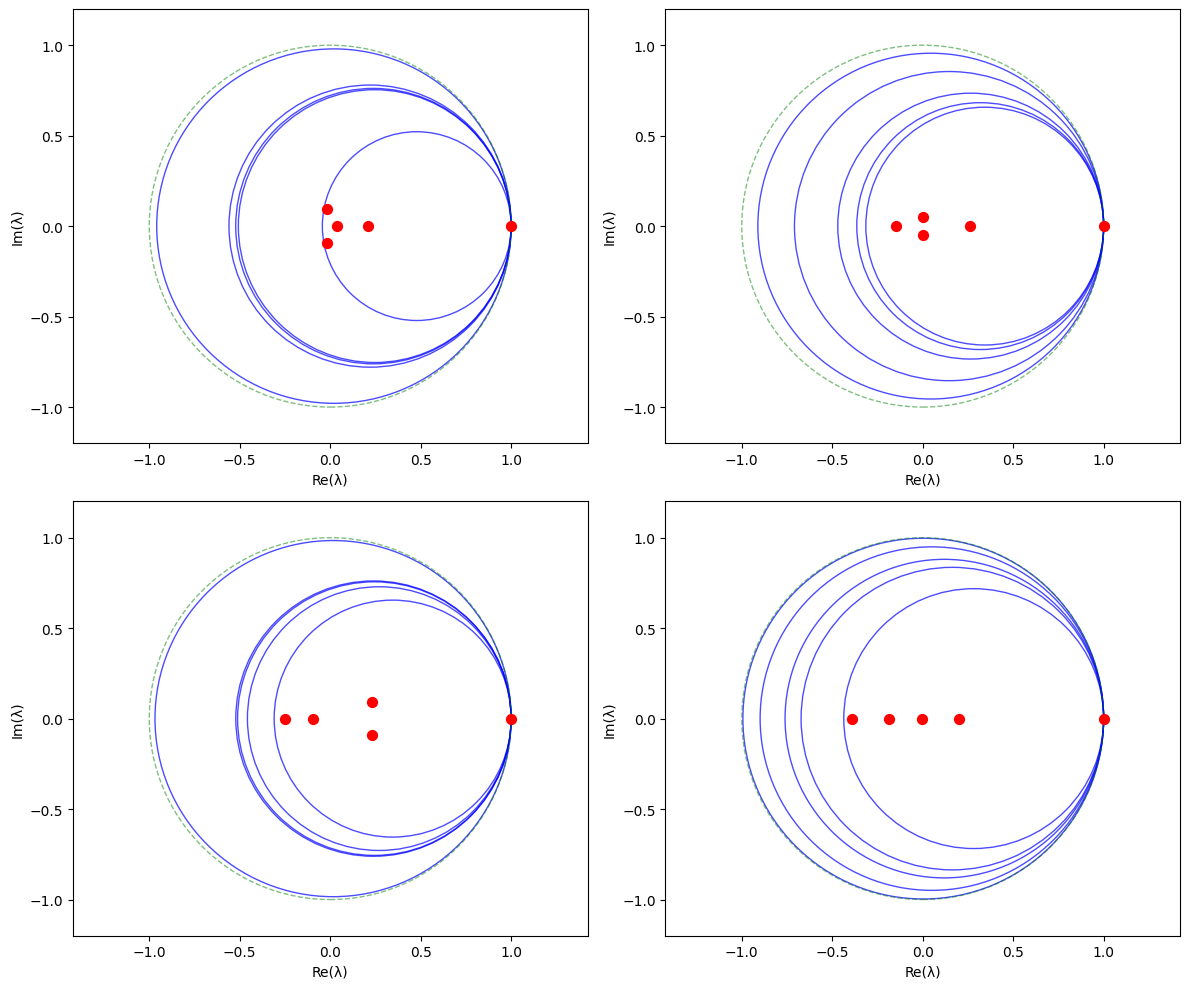

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_stochastic_matrix(n):
    a = np.random.rand(n, n)
    row_sums = a.sum(axis=1, keepdims=True)
    a = a / row_sums
    return a

def check_eigenvalue_property(a):
    eigenvalues = np.linalg.eigvals(a)
    has_eigenvalue_1 = np.any(np.abs(eigenvalues - 1) < 1e-10)
    all_eigenvalues_leq_1 = np.all(np.abs(eigenvalues) <= 1 + 1e-10)
    return eigenvalues, has_eigenvalue_1, all_eigenvalues_leq_1

def plot_gershgorin_and_eigenvalues(a, eigenvalues, ax):
    n = a.shape[0]
    xg = np.diag(a).real
    yg = np.diag(a).imag
    rg = np.zeros(n)
    for i in range(n):
        rg[i] = np.sum(np.abs(a[i, :])) - np.abs(a[i, i])
    for i in range(n):
        circle = plt.Circle((xg[i], yg[i]), radius=rg[i], fill=False, edgecolor='blue', alpha=0.7, linewidth=1)
        ax.add_patch(circle)
    ax.scatter(eigenvalues.real, eigenvalues.imag, color='red', s=50, label="Собственные значения", zorder=3)
    unit_circle = plt.Circle((0, 0), radius=1, fill=False, edgecolor='green', linestyle='--', alpha=0.5)
    ax.add_patch(unit_circle)
    ax.set_xlabel('Re(λ)')
    ax.set_ylabel('Im(λ)')
    ax.axis('equal')
    max_radius = max(1, np.max(rg), np.max(np.abs(eigenvalues)))
    ax.set_xlim(-max_radius-0.2, max_radius+0.2)
    ax.set_ylim(-max_radius-0.2, max_radius+0.2)

n = 5
num_matrices = 4
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx in range(num_matrices):
    a = generate_stochastic_matrix(n)
    eigenvalues, has_eigenvalue_1, all_leq_1 = check_eigenvalue_property(a)
    plot_gershgorin_and_eigenvalues(a, eigenvalues, axes[idx])

plt.tight_layout()
plt.show()

In [8]:
def power_method(G, alpha=0.85, tol=1e-8, max_iter=100):
    
    n = G.shape[0]
    
    x = np.ones(n) / n
    const = (1 - alpha) / n
    for i in range(max_iter):
        y = G.dot(x) * alpha + const
        
        y = y / y.sum()
        
        diff = np.linalg.norm(y - x, 1)
        
        if diff < tol:
            break
        
        x = y
    
    top_indices = np.argsort(x)[-10:][::-1]
    top_nodes = [(idx + 1, x[idx]) for idx in top_indices]

    return x, top_nodes

In [11]:
n = 6
H = np.array([
    [0, 0, 0.5, 0, 0.5, 0],
    [1/3, 0, 0, 0, 0, 0.5],
    [1/3, 0.5, 0, 0, 0, 0],
    [1/3, 0, 0, 0, 0.5, 0.5],
    [0, 0.5, 0, 0.5, 0, 0],
    [0, 0, 0.5, 0.5, 0, 0]
])

α = 0.85
E = np.ones((n, n)) / n
G = α * H + (1 - α) * E

pagerank, top_nodes = power_method(G)
print("PageRank:", pagerank)
print("Сумма компонент:", np.sum(pagerank))

PageRank: [0.15917156 0.14662966 0.13755378 0.20985992 0.17503186 0.1717532 ]
Сумма компонент: 1.0000000000000002


In [7]:
from scipy.linalg import hilbert, pascal, lu_factor, lu_solve

def rayleigh_inverse_iteration(A, mu=0, max_iter=1000, tol=1e-10):
    n = A.shape[0]
    v = np.ones(n) / np.sqrt(n)
    I = np.eye(n)
    lambda_ray = mu
    
    for iteration in range(max_iter):
        M = A - lambda_ray * I
        if np.any(np.isinf(M)) or np.any(np.isnan(M)):
            M = np.where(np.isinf(M) | np.isnan(M), 0, M)
        lu, piv = lu_factor(M)
        w = lu_solve((lu, piv), v)
        
        v_new = w / np.linalg.norm(w)
        if np.any(np.isnan(v_new)):
            v_new = np.ones(n) / np.sqrt(n)
        
        lambda_new = v_new.T @ A @ v_new
        
        if np.abs(lambda_new - lambda_ray) < tol:
            break
        
        v = v_new
        lambda_ray = lambda_new
    
    return lambda_ray, v, iteration + 1

def find_min_abs_eigenvalue(A):
    lambda_val, v, _ = rayleigh_inverse_iteration(A, mu=0)
    return lambda_val, v

def find_nearest_eigenvalue(A, target):
    lambda_val, v, _ = rayleigh_inverse_iteration(A, mu=target)
    return lambda_val, v

def generate_hilbert_matrix(n):
    H = hilbert(n)
    return H

def generate_lemer_matrix(n):
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            H[i, j] = min(i+1, j+1) / max(i+1, j+1)
    return H

def generate_pascal_matrix(n):
    return pascal(n, kind='symmetric')

def generate_tridiagonal_matrix(n):
    A = np.zeros((n, n))
    for i in range(n):
        A[i, i] = 2
        if i > 0:
            A[i, i-1] = -1
            A[i-1, i] = -1
    return A

n_values = range(2, 11)
matrices = [
    (generate_hilbert_matrix, "Hilbert"),
    (generate_lemer_matrix, "Lemer"),
    (generate_pascal_matrix, "Pascal"),
    (generate_tridiagonal_matrix, "Tridiagonal")
]

for matrix_func, name in matrices:
    results_min = []
    results_near = []
    
    for n in n_values:
        A = matrix_func(n)
        
        lambda_min, v_min = find_min_abs_eigenvalue(A)
        results_min.append(lambda_min)
    
        lambda_near, v_near = find_nearest_eigenvalue(A, 0.5)
        results_near.append(lambda_near)


    print(f"{name}:")
    print("Min abs eigenvalues:", [f"{val:.6e}" if not np.isnan(val) else "NaN" for val in results_min])
    print("Nearest to 0.5:", [f"{val:.6e}" if not np.isnan(val) else "NaN" for val in results_near])
    print()

Hilbert:
Min abs eigenvalues: ['6.574145e-02', '2.687340e-03', '9.670230e-05', '1.567051e+00', '1.083700e-07', '3.496899e-09', '1.112517e-10', '0.000000e+00', '0.000000e+00']
Nearest to 0.5: ['1.267592e+00', '1.408319e+00', '1.691412e-01', '2.085342e-01', '2.423609e-01', '2.719202e-01', '2.981252e-01', '3.216331e-01', '3.429295e-01']

Lemer:
Min abs eigenvalues: ['1.500000e+00', '2.012446e+00', '2.536162e+00', '3.066640e+00', '1.156908e+00', '1.310467e+00', '1.464869e+00', '1.620257e+00', '1.776579e+00']
Nearest to 0.5: ['1.500000e+00', '2.012446e+00', '8.482292e-01', '5.010314e-01', '5.869137e-01', '6.680247e-01', '1.464869e+00', '8.220720e-01', '8.969431e-01']

Pascal:
Min abs eigenvalues: ['3.819660e-01', '7.872983e+00', '4.538346e-01', '1.000000e+00', '4.893388e-01', '1.000000e+00', '5.118916e-01', '1.000000e+00', '5.280379e-01']
Nearest to 0.5: ['5.000000e-01', '1.000000e+00', '4.538346e-01', '1.000000e+00', '4.893388e-01', '1.000000e+00', '5.118916e-01', '1.000000e+00', '5.280379

C:\Users\user\AppData\Local\Temp\ipykernel_6784\2320994290.py:16: RuntimeWarning: invalid value encountered in divide
  v_new = w / np.linalg.norm(w)


In [ ]:
import numpy as np
import scipy.sparse as sp
from numba import jit, prange

@jit(nopython=True, parallel=True, nogil=True)
def pagerank_iteration_csr(A_data, A_indices, A_indptr, inv_deg, x, alpha, teleport, n):
    y = np.zeros(n)
    for i in prange(n):
        s = teleport
        start = A_indptr[i]
        end = A_indptr[i + 1]
        for idx in range(start, end):
            j = A_indices[idx]
            s += alpha * A_data[idx] * inv_deg[j] * x[j]
        y[i] = s
    
    y_sum = np.sum(y)
    diff = 0.0
    inv_sum = 1.0 / y_sum
    for i in prange(n):
        old = x[i]
        new = y[i] * inv_sum
        x[i] = new
        diff += abs(new - old)
    
    return diff

def load_graph_fast(filename):
    edges = []
    max_node = 0
    
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith('#'):
                continue
            parts = line.strip().split()
            if len(parts) >= 2:
                u = int(parts[0])
                v = int(parts[1])
                if u > max_node:
                    max_node = u
                if v > max_node:
                    max_node = v
                edges.append((u - 1, v - 1))
    
    n = max_node
    rows, cols = zip(*edges)
    
    return sp.csr_matrix((np.ones(len(edges), dtype=np.float32), (rows, cols)), shape=(n, n))

def power_method_fast(A, alpha=0.8, tol=1e-8, max_iter=1000):
    n = A.shape[0]
    
    if not A.has_sorted_indices:
        A.sort_indices()
    
    A_data = A.data.astype(np.float32)
    A_indices = A.indices.astype(np.int32)
    A_indptr = A.indptr.astype(np.int32)
    
    out_degree = A.sum(axis=0).A1.astype(np.float32)
    inv_deg = np.zeros(n, dtype=np.float32)
    mask = out_degree > 0
    inv_deg[mask] = 1.0 / out_degree[mask]
    
    x = np.ones(n, dtype=np.float32) / n
    teleport = np.float32((1 - alpha) / n)
    
    for i in range(max_iter):
        diff = pagerank_iteration_csr(A_data, A_indices, A_indptr, inv_deg, x, alpha, teleport, n)
        
        if diff < tol:
            return x, i + 1, 1.0
    
    return x, max_iter, 1.0

def get_top_k(pagerank, k=10):
    indices = np.argpartition(pagerank, -k)[-k:]
    indices = indices[np.argsort(pagerank[indices])[::-1]]
    return [(idx + 1, pagerank[idx]) for idx in indices]

A = load_graph_fast('web-Stanford.txt')

pagerank, iterations, eigenvalue = power_method_fast(A, alpha=0.8, tol=1e-8)

top_node = np.argmax(pagerank) + 1
top_value = pagerank[top_node - 1]
top_10 = get_top_k(pagerank, 10)

print(f"Итераций: {iterations}")
print(f"Собственное значение: {eigenvalue:.10f}")
print(f"Наибольший PageRank: узел {top_node} ({top_value:.6e})")
print("Топ-10:")
for rank, (node, value) in enumerate(top_10, 1):
    print(f"{rank}. Узел {node}: {value:.6e}")

Итераций: 1000
Собственное значение: 1.0000000000
Наибольший PageRank: узел 29878 (3.442051e-03)
Топ-10:
1. Узел 29878: 3.442051e-03
2. Узел 114260: 2.813976e-03
3. Узел 215179: 1.933628e-03
4. Узел 95703: 1.911155e-03
5. Узел 260408: 1.867166e-03
6. Узел 68889: 1.709821e-03
7. Узел 270862: 1.653265e-03
8. Узел 265576: 1.072389e-03
9. Узел 113950: 1.027429e-03
10. Узел 202661: 9.663804e-04


In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G_stanford = nx.read_edgelist('web-Stanford.txt', comments='#', create_using=nx.DiGraph(), nodetype=int)

pagerank_dict = nx.pag
erank(G_stanford, alpha=0.8, tol=1e-08, max_iter=100)

node_ids = list(pagerank_dict.keys())
pagerank_values = np.array(list(pagerank_dict.values()))

top_10_indices = np.argsort(pagerank_values)[-10:][::-1]
top_10_nodes = [node_ids[i] for i in top_10_indices]
top_10_values = pagerank_values[top_10_indices]

print(f"\nТоп-10 узлов по значению PageRank:")
for i, (node, value) in enumerate(zip(top_10_nodes, top_10_values), 1):
    print(f"{i:2}. Узел {node:8}: {value:.6e}")

base_size = 20
scale_factor = 50000 
node_size_map = [base_size] * G_stanford.number_of_nodes()

for i, node_id in enumerate(top_10_nodes):
    node_index = list(G_stanford.nodes()).index(node_id)
    node_size_map[node_index] = base_size + scale_factor * (1.0 - i/10)

pos = nx.spring_layout(G_stanford, k=0.15, iterations=20, seed=42)

plt.figure(figsize=(20, 15))

nx.draw_networkx_edges(G_stanford, pos, alpha=0.05, edge_color='gray', width=0.3)

nx.draw_networkx_nodes(G_stanford, pos, node_size=node_size_map, node_color='lightblue', alpha=0.6)

top_10_labels = {node: str(node) for node in top_10_nodes}
nx.draw_networkx_labels(G_stanford, pos, labels=top_10_labels, font_size=10, font_weight='bold')

plt.title("Stanford.edu Web Graph: PageRank Visualization\n(Top-10 nodes are larger and labeled)", fontsize=16)
plt.axis('off')
plt.tight_layout()

plt.show()


Топ-10 узлов по значению PageRank:
 1. Узел    89073: 1.050523e-02
 2. Узел   226411: 9.642950e-03
 3. Узел   241454: 8.440366e-03
 4. Узел   134832: 3.267513e-03
 5. Узел    69358: 2.739877e-03
 6. Узел    67756: 2.711377e-03
 7. Узел   234704: 2.673390e-03
 8. Узел   225872: 2.532351e-03
 9. Узел   186750: 2.503724e-03
10. Узел   262860: 2.495252e-03


KeyboardInterrupt: 